# Pymaceuticals Inc.
---

### Analysis

Pymaceuticals, Inc. is a pharmaceutical company specializing in anti-cancer medications.  In this current study, we have identified 248 mice with squamous cell carcinoma (SCC) tumors.  We have randomly assigned mice to a variety of cancer drug regimens and monitored tumor development over the course of 45 days.  More specifically, we are comparing the drug, Capomulin, to several other treatments.

Mice were pretty well evenly distributed by gender (51% male, 49% female) and by treatment.   Among measured tumor volumes, there was only one outlier subject among Capomulin’s top comparisons (Infubinol). We can also see that tumor volume decreased by approximately 10 mm3 over the course of the trial for a randomly selected mouse (ID: i738) treated with Capomulin.  

Interestingly, there is also a high positive correlation between average tumor volume and mouse weight (r2 = 0.84).  This correlation is most likely related to the fact that the weight of the tumor adds a proportionate amount of weight to the young, small mice in this study.  Therefore, the "causation" associated with this correlation is likely because "the larger the tumor, the heavier the tumor, thus the heavier the overall mouse weight."




 

In [119]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
mouse_study_df = pd.DataFrame(merge_df)

# Display the data table for preview
mouse_study_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [120]:
# Checking the number of mice.
mice_count = mouse_study_df["Mouse ID"].value_counts()
len(mice_count)

249

In [121]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = mouse_study_df.loc[mouse_study_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [122]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_ids_df = mouse_study_df.loc[mouse_study_df["Mouse ID"].isin(duplicate_mouse_ids)]
duplicate_mouse_ids_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [123]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = mouse_study_df.drop([908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920])
clean_mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [124]:
# Checking the number of mice in the clean DataFrame.
clean_data_mice_count = clean_mouse_df["Mouse ID"].value_counts()
len(clean_data_mice_count)

248

## Summary Statistics

In [125]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drug_regimen = clean_mouse_df.set_index("Drug Regimen").groupby(["Drug Regimen"])
drug_regimen

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_volume = drug_regimen["Tumor Volume (mm3)"].mean()
median_volume = drug_regimen["Tumor Volume (mm3)"].median()
var_volume = drug_regimen["Tumor Volume (mm3)"].var()
std_volume = drug_regimen["Tumor Volume (mm3)"].std()
sem_volume = drug_regimen["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
drug_regimen_dict = {"Mean Tumor Volume": mean_volume, "Median Tumor Volume": median_volume, "Tumor Volume Variance": var_volume, "Tumor Volume Std. Dev.": std_volume, "Tumor Volume Std. Err.": sem_volume}
drug_regimen_df = pd.DataFrame(drug_regimen_dict)
drug_regimen_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [126]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_drug_regimen_df = drug_regimen_df.agg
agg_drug_regimen_df

<bound method DataFrame.aggregate of               Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              

## Bar and Pie Charts

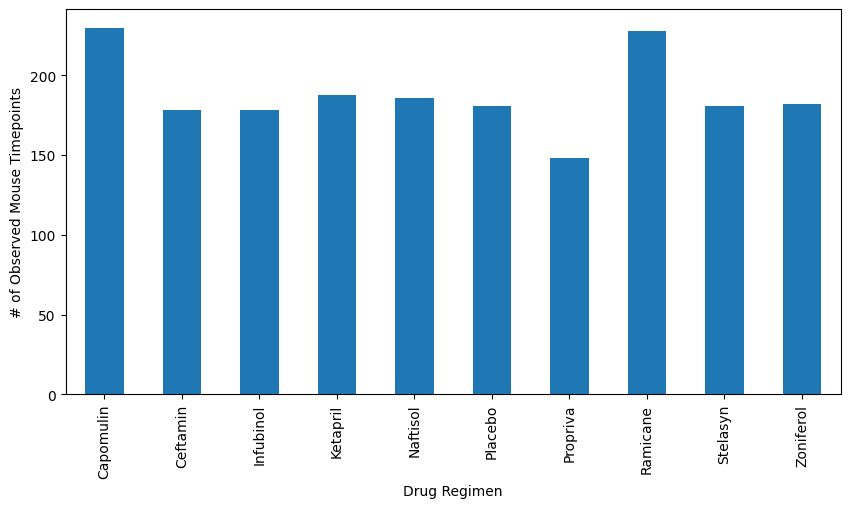

In [127]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
clean_drug_regimen = clean_mouse_df.groupby("Drug Regimen")
clean_drug_regimen_IDs = clean_drug_regimen.count()
clean_drug_regimen_IDs_pandas = clean_drug_regimen_IDs[["Timepoint"]]
clean_drug_regimen_IDs_pandas

clean_drug_regimen_IDs_pandas.plot(kind="bar", figsize=(10,5), legend=None)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.show()


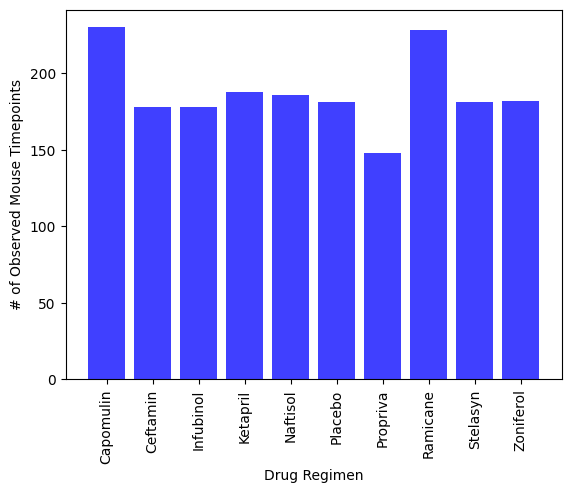

In [128]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
clean_drug_regimen = clean_mouse_df.groupby("Drug Regimen")
clean_drug_regimen_IDs = clean_drug_regimen.count()
clean_drug_regimen_IDs

drugs = clean_drug_regimen_IDs.index
timepoint = clean_drug_regimen_IDs["Timepoint"]
y_axis = timepoint
plt.bar(drugs, y_axis, color="b", alpha=.75, align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.show()

<Axes: ylabel='Sex'>

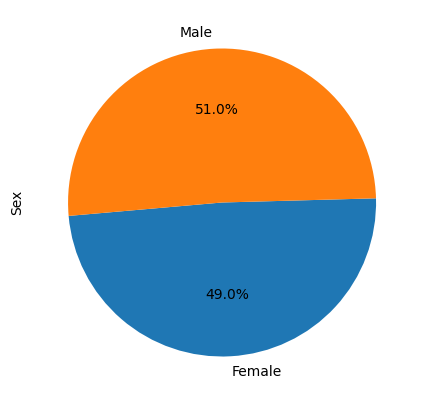

In [129]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex = clean_mouse_df.groupby(['Sex'])['Sex'].count()
sex.plot.pie(startangle=185,autopct='%1.1f%%', figsize=(5, 5))


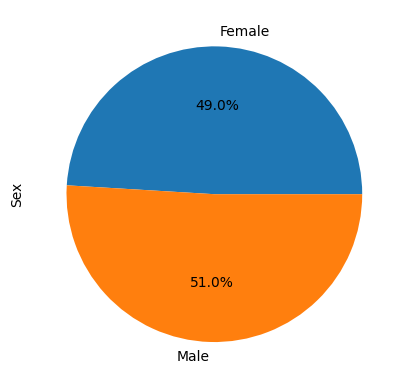

In [130]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_df = clean_mouse_df.groupby("Sex")
gender_count = gender_df.count()
gender_count_pie_df = gender_count[["Mouse ID"]]
gender_count_pie_df

sex = gender_count_pie_df.index
MouseID = gender_count_pie_df["Mouse ID"]

plt.pie(MouseID, labels=sex,
        autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [131]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = pd.DataFrame(clean_mouse_df.groupby(['Mouse ID'])['Timepoint'].max())
max_timepoint

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(clean_mouse_df, max_timepoint, on=('Mouse ID', 'Timepoint'), how='right')
final_tumor_volume.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1


In [132]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
capomulin = []
ramicane = []
infubinol = []
ceftamin = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in final_tumor_volume.iterrows():
    if row["Drug Regimen"] == 'Capomulin':
        capomulin.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == 'Ramicane':
        ramicane.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == 'Infubinol':
        infubinol.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == 'Ceftamin':
        ceftamin.append(row['Tumor Volume (mm3)'])
    
    
    # add subset 
drugs_df = pd.DataFrame({"Capomulin": capomulin,
                       "Ramicane": ramicane,
                        "Infubinol": infubinol,
                       "Ceftamin": ceftamin
                       })
drugs_df

    # Determine outliers using upper and lower bounds
quart_cap = drugs_df["Capomulin"].quantile([.25, .5, .75])
lowerq_cap = quart_cap[.25]
upperq_cap = quart_cap[.75]
iqr_cap = upperq_cap-lowerq_cap
lower_bound_cap = lowerq_cap - (1.5*iqr_cap)
upper_bound_cap = upperq_cap + (1.5*iqr_cap)

quart_ram = drugs_df["Ramicane"].quantile([.25, .5, .75])
lowerq_ram = quart_ram[.25]
upperq_ram = quart_ram[.75]
iqr_ram = upperq_ram-lowerq_ram
lower_bound_ram = lowerq_ram - (1.5*iqr_ram)
upper_bound_ram = upperq_ram + (1.5*iqr_ram)

quart_inf = drugs_df["Infubinol"].quantile([.25, .5, .75])
lowerq_inf = quart_inf[.25]
upperq_inf = quart_inf[.75]
iqr_inf = upperq_inf-lowerq_inf
lower_bound_inf = lowerq_inf - (1.5*iqr_inf)
upper_bound_inf = upperq_inf + (1.5*iqr_inf)

quart_cef = drugs_df["Ceftamin"].quantile([.25, .5, .75])
lowerq_cef = quart_cef[.25]
upperq_cef = quart_cef[.75]
iqr_cef = upperq_cap-lowerq_cef
lower_bound_cef = lowerq_cef - (1.5*iqr_cef)
upper_bound_cef = upperq_cef + (1.5*iqr_cef)

print(f"Capomulin's potential outliers would have tumor volumes less than {lower_bound_cap} mm3 or greater than {upper_bound_cap} mm3.")
print(f"Ramicane's potential outliers would have tumor volumes less than {lower_bound_ram} mm3 or greater than {upper_bound_ram} mm3.")
print(f"Infubinol's potential outliers would have tumor volumes less than {lower_bound_inf} mm3 or greater than {upper_bound_inf} mm3.")
print(f"Ceftamin's potential outliers would have tumor volumes less than {lower_bound_cef} mm3 or greater than {upper_bound_cef} mm3.")

Capomulin's potential outliers would have tumor volumes less than 20.70456164999999 mm3 or greater than 51.83201549 mm3.
Ramicane's potential outliers would have tumor volumes less than 17.912664470000003 mm3 or greater than 54.30681135 mm3.
Infubinol's potential outliers would have tumor volumes less than 36.83290494999999 mm3 or greater than 82.74144559000001 mm3.
Ceftamin's potential outliers would have tumor volumes less than 61.56636417499999 mm3 or greater than 51.455543705 mm3.


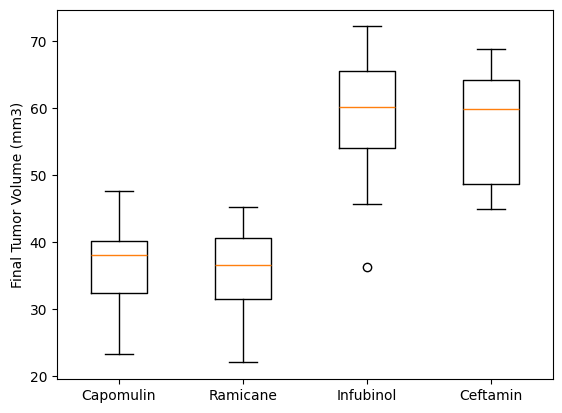

In [133]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(drugs_df)
plt.xticks([1,2,3,4], treatments)
plt.show()

## Line and Scatter Plots

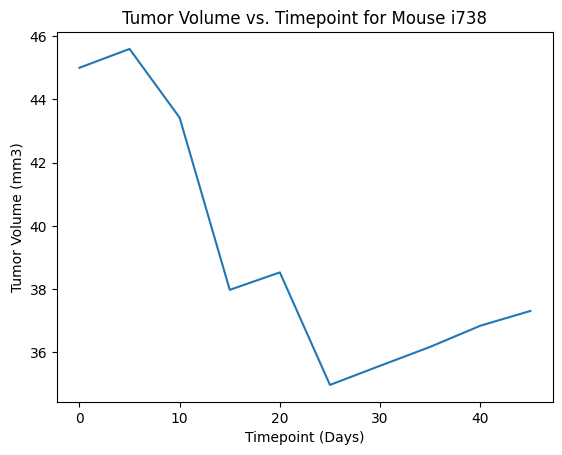

In [134]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
line_plot = clean_mouse_df.loc[clean_mouse_df["Mouse ID"] == "i738",:]

x_axis_timepoint = line_plot["Timepoint"] 
y_axis_tumor = line_plot["Tumor Volume (mm3)"]

plt.plot(x_axis_timepoint, y_axis_tumor) 
plt.title('Tumor Volume vs. Timepoint for Mouse i738')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

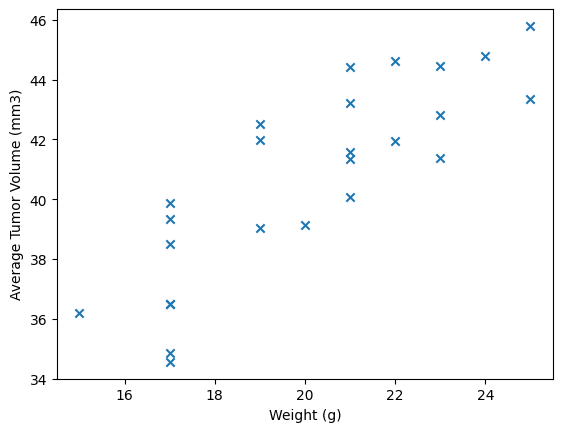

In [135]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
scatter_plot = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Capomulin",:]
capo_avg = pd.DataFrame(scatter_plot.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'Average Tumor Volume (mm3)'})
capo_avg = pd.merge(scatter_plot, capo_avg, on='Mouse ID')
capo_avg_clean = capo_avg[['Weight (g)', 'Average Tumor Volume (mm3)']].drop_duplicates()
capo_avg_clean

x = capo_avg_clean['Weight (g)']
y = capo_avg_clean['Average Tumor Volume (mm3)']

plt.scatter(x, y, marker="x")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84.


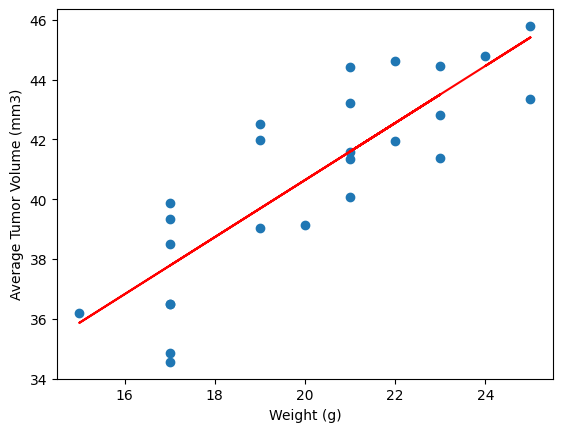

In [136]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(x,y)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}.")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()